In [115]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 

Interpolation is a process by which "gaps" in a data set may be filled using relatively simple equations. Interpolation differs from fitting in that:

- Interpolations are required to exactly hit all the data points, whereas fits may not hit any of the data points, and
- Interpolations are based on, often simple, mathematical formulas without regard to the underlying system which produced the data.

In Python, interpolation can be performed using the interp1d method of the scipy.interpolate package. This method will create an interpolation function based on the independent data, the dependent data, and the kind of interpolation you want with options inluding nearest, linear, and cubic (which uses not-a-knot conditions). Alternately, if you want to do some form of cubic spline, especially some form that is not not-a-knot, you can use the CubicSpline method of the scipy.interpolate package.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html

- The purpose of interpolation 

 for given some $x_{data}=[\dots]$ and $y_{data}=[\dots]$  the goal is to create a function $y=f(x)$ where one can plug any value of $x$ and corresponding $y$ value can be obtained. Let's take an example.

In [116]:
x_data=np.linspace(0,10, 10)
y_data=x_data**2

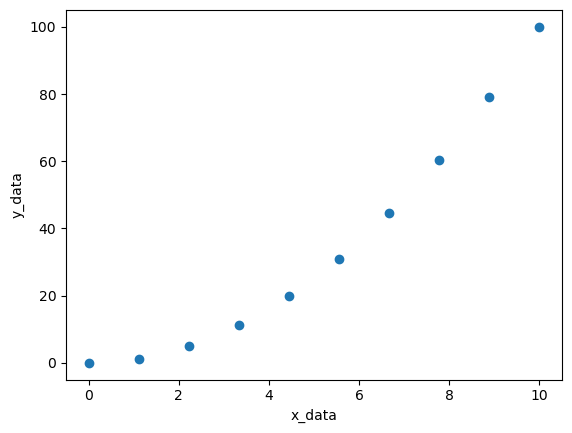

In [117]:
plt.scatter(x_data,y_data)
plt.xlabel("x_data")
plt.ylabel("y_data")
plt.show()

In the above plot we see that for intermediate values of x we can not have get y values. y values occurs only for specific values of x. however we want to get some y values for intermediate values of x. This can be done by interpolation and this the job of using interpolation that we want to create a function $y=f(x)$ that can return us some y values for chosen x values.

matpplotlib plt.plot() uses kind of linear interpolation. Let's take a look!

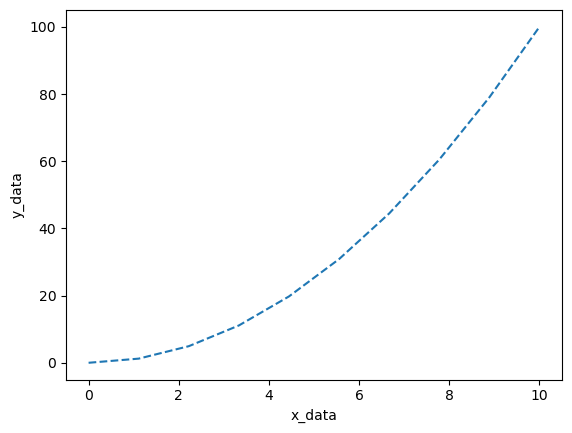

In [118]:
plt.plot(x_data,y_data,"--")
plt.xlabel("x_data")
plt.ylabel("y_data")
plt.show()

In the above fig it can be seen that matplotlib connected all the data points by a line. So this is an example of linear interpolation. However we will see the actual interpolation using scipy.interpolate package below.


In [119]:
#importing library

from scipy.interpolate import interp1d,interp2d
from scipy.interpolate import CubicSpline
from scipy.integrate import quad, solve_ivp

In [120]:
y_f=interp1d(x_data,y_data, 'linear') #y_f represents function of x_data

print(y_f(3.3)) #this retuens y values for chosen intermediate x values, interp1d done the job for us!

10.925925925925926


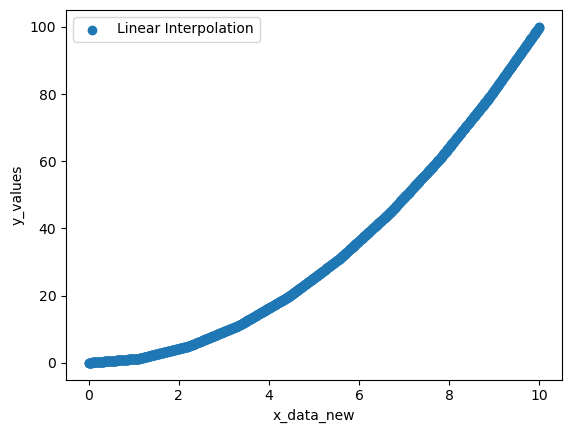

In [121]:
#return y values for many x values

x_data_new=np.linspace(0,10, 1000) # new dataset with thousand intermediate steps with the same x_data that we used to create y_f function

y_values=y_f(x_data_new)

plt.scatter(x_data_new,y_values, label="Linear Interpolation")
plt.xlabel("x_data_new")
plt.ylabel("y_values")
plt.legend()

We can also use cubic interpolation. Cubic Interpolation usually gives nice result than linear one. Let's take a look.

In [122]:
y_f=interp1d(x_data,y_data, 'cubic') #y_f represents function of x_data

print(y_f(3.3)) #this retuens y values for chosen intermediate x values, interp1d done the job for us!

10.89


Remark:

Note that using linear interoplation function returns y=10.925925925925926 for x= 3.3 however using using cubic interoplation function returns y=10.89 for x= 3.3. That means cubic interpolation is comparatively more precise than linear interpolation.

- Usefulness
So when exactly is this useful? 

In some situations, a functional form is preferred/required:

- computing integrals (preferred)
- differential equations (required)
- many many other applications...


Example: Computing integral. Given a distribution of energies in a beam of photons, compute the mean energy.



In [123]:
E_data = np.array([ 0.1  ,  0.2  ,  0.3  ,  0.4  ,  0.5  ,  0.55 ,  0.662,  0.8  ,
        1.   ,  1.25 ,  1.5  ,  2.   ,  3.   ,  4.   ,  5.   ,  6.   ,
        8.   , 10.   ])

S_data = np.array([0.   , 0.032, 0.06 , 0.086, 0.109, 0.131, 0.151, 0.185, 0.212,
       0.238, 0.257, 0.274, 0.256, 0.205, 0.147, 0.096, 0.029, 0.002])

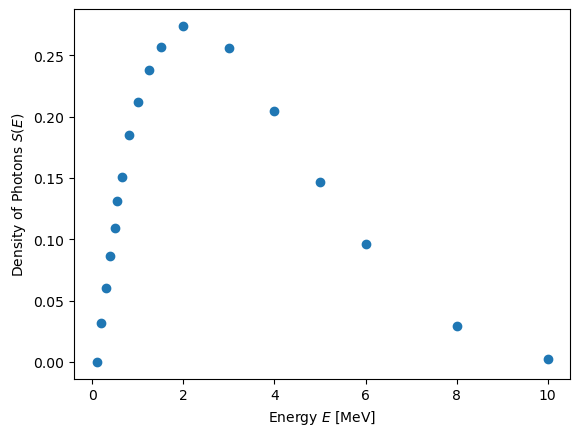

In [124]:
plt.scatter(E_data, S_data)
plt.xlabel('Energy $E$ [MeV]')
plt.ylabel('Density of Photons $S(E)$')
plt.show()


The mean energy is given by $$\bar E=\frac{\int E S(E) dE}{\int S(E) dE}$$


To conveniently evaluate this integral, we need a function S_f that takes in an energy and returns a spectrum value

In [125]:
S_f = interp1d(E_data, S_data, 'cubic')

numerator = quad(lambda E: E*S_f(E), min(E_data), max(E_data))[0]
denominator = quad(lambda E: S_f(E), min(E_data), max(E_data))[0]
E_mean = numerator/denominator

print("Mean photon energy E={}".format(E_mean))

Mean photon energy E=3.3825472782623387


Example: Solving a Differential Equation. The rocket equation is given by

$$\frac{dv}{dt}=-a-\frac{b}{m(t)}v^2-\frac{1}{m(t)}\frac{d(m(t))}{dt}$$



Where m is the speed at which fuel is expelled. The function $m(t)$ is needed to solve this ODE. $m(t)$ might not be known exactly, but it may be the case that it can be obtained from data.

In [126]:
t_data = np.array([0.0,0.25,0.5,0.75,1.0])
m_data = np.array([1.0,0.99912109,0.971875,0.78642578, 0.1])

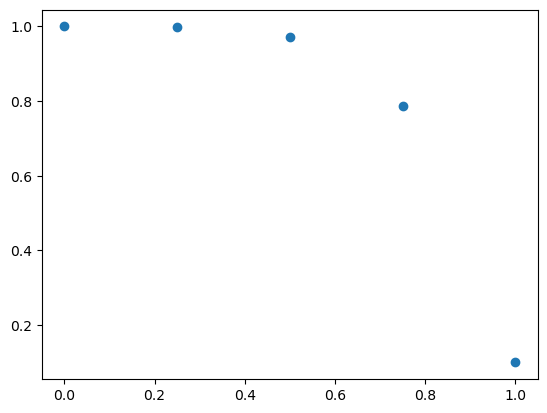

In [127]:
plt.scatter(t_data,m_data)

In [128]:
#creating function using cubic interpolation

m_f = interp1d(t_data, m_data, 'cubic')
dmdt_f = m_f._spline.derivative(nu=1)
t = np.linspace(min(t_data),max(t_data),100)
m = m_f(t)
dmdt = dmdt_f(t)

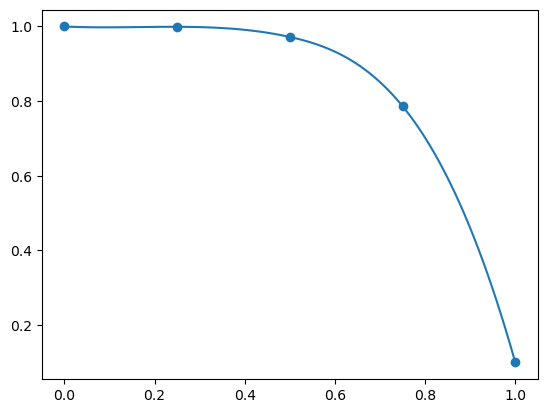

In [129]:
plt.scatter(t_data, m_data) #intial data points
plt.plot(t, m) #interpolated data points

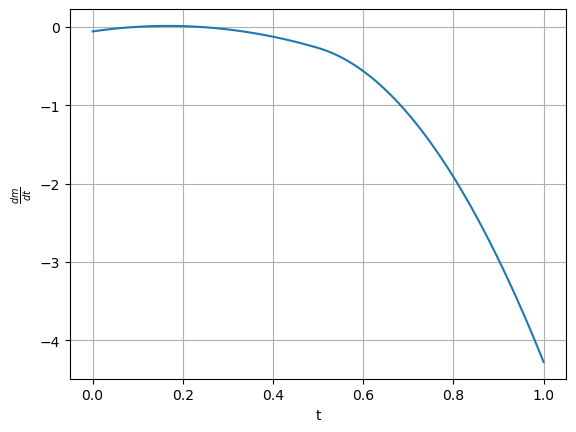

In [130]:
# We can take look at the derivative of the cubic interpolation too

plt.plot(t, dmdt)
plt.xlabel("t")
plt.ylabel(r"$\frac{dm}{dt}$")
plt.grid()

In [131]:
a = 0.78
b = 0.1

def dvdt(t,v):
    return -a-b/m_f(t)-dmdt_f(t)/m_f(t)

sol = solve_ivp(dvdt, [1e-4, 1], y0=[0], t_eval=np.linspace(1e-4,1,1000))

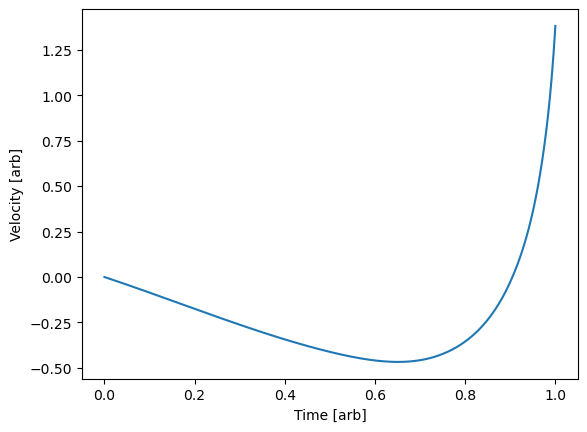

In [132]:
plt.plot(sol.t, sol.y[0])
plt.ylabel('Velocity [arb]')
plt.xlabel('Time [arb]')
plt.show()

One can also use interp2d for 2 dimensional interpolation. https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d





Text(0.5, 1.0, 'Generally Using interp1')

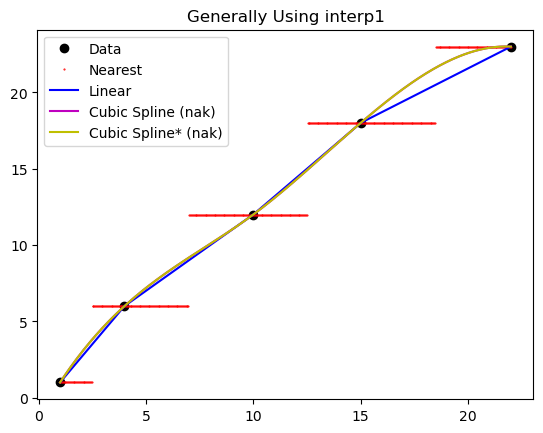

In [133]:
x = np.array([1, 4, 10, 15, 22])
y = np.array([1, 6, 12, 18, 23])

fun_1= interp1d(x, y, kind='nearest') # nearest neighbor

fun_2= interp1d(x, y, kind='linear') #linear

fun_3= interp1d(x, y, kind='cubic') #cubic

fun_4= CubicSpline(x, y)

xmodel = np.linspace(x.min(), x.max(), 500)


plt.plot(x, y, 'ko', label='Data')

plt.plot(xmodel, fun_1(xmodel), 'r.', label='Nearest', ms=1)
plt.plot(xmodel, fun_2(xmodel), 'b-', label='Linear')
plt.plot(xmodel, fun_3(xmodel), 'm-', label='Cubic Spline (nak)')
plt.plot(xmodel, fun_4(xmodel), 'y-', label='Cubic Spline* (nak)')
plt.legend()
plt.title ('Generally Using interp1')